In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

# Gathering our data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])

df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)

# df.head()

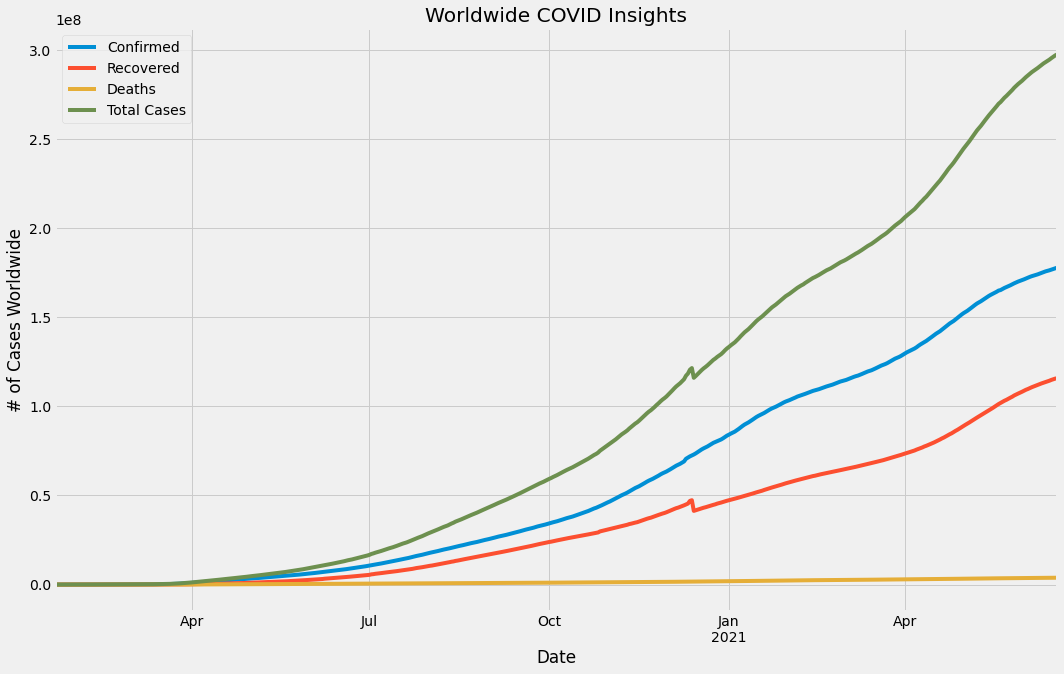

In [62]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
# worldwide_df.head()
w = worldwide_df.plot(figsize = (16, 10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

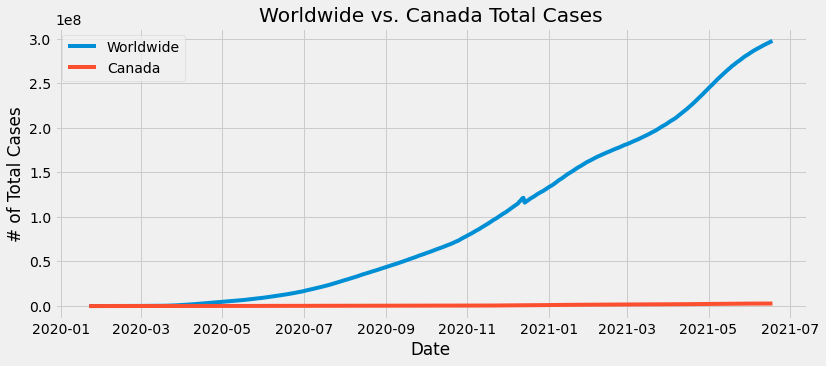

In [63]:
# Canada vs. Worldwide Cases

canada_df = df[df['Country'] == 'Canada'].groupby(['Date']).sum()
# congo_df = df[df['Country'] == 'Congo (Brazzaville)'].groupby(['Date']).sum()

fig_canada = plt.figure(figsize = (12, 5))
# fig_congo = plt.figure(figsize = (12, 15))

ax = fig_canada.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(canada_df[['Total Cases']], label = 'Canada')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. Canada Total Cases')

plt.legend(loc='upper left')
plt.show()

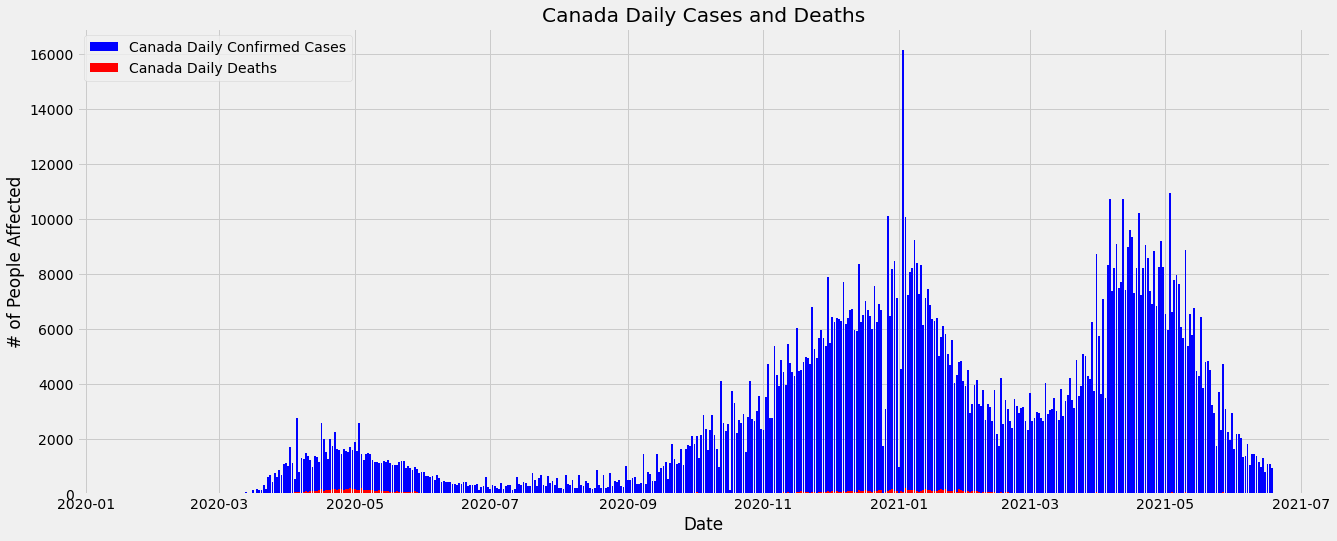

In [70]:
# Canada Daily Cases and Deaths

canada_df = canada_df.reset_index()
canada_df['Daily Confirmed'] = canada_df['Confirmed'].sub(canada_df['Confirmed'].shift())
canada_df['Daily Deaths'] = canada_df['Deaths'].sub(canada_df['Deaths'].shift())

fig_canada = plt.figure(figsize = (20, 8))
ax = fig_canada.add_subplot(111)

ax.bar(canada_df['Date'], canada_df['Daily Confirmed'], color = 'b', label = 'Canada Daily Confirmed Cases')
ax.bar(canada_df['Date'], canada_df['Daily Deaths'], color = 'r', label = 'Canada Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Canada Daily Cases and Deaths')

plt.legend(loc = 'upper left')
plt.show()

<ipython-input-82-26442d3515f3>:17: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(top_10['Confirmed'], labels = top_10['Country'], autopct = '%1.1f%%')


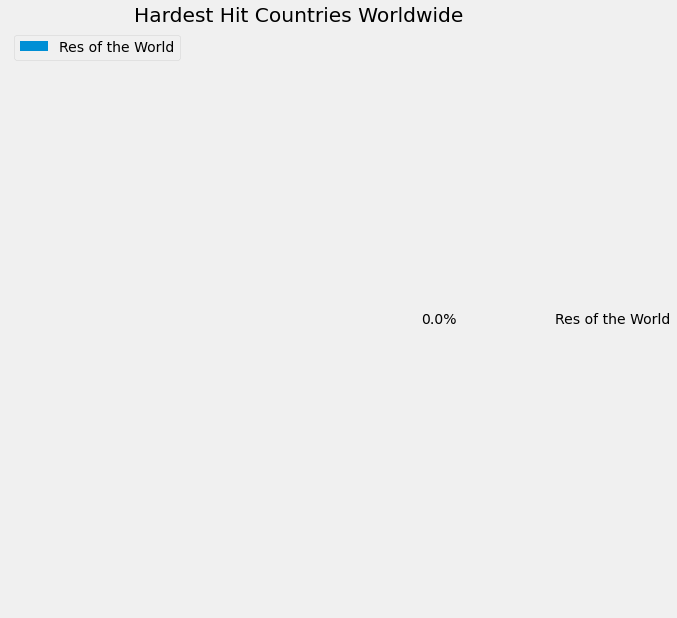

In [82]:
# Worst Hit Countries by COVID-19
from datetime import date, timedelta

yesterday = date.today() - timedelta(days = 1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date'] == yesterday]

top_10 = today_df.sort_values(['Confirmed'], ascending = False)[:10]

top_10.loc['rest-of-the-world'] = today_df.sort_values(['Confirmed'], ascending = False)[10:].sum()
top_10.loc['rest-of-the-world', 'Country'] = 'Res of the World'

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels = top_10['Country'], autopct = '%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc = 'upper left')
plt.show()